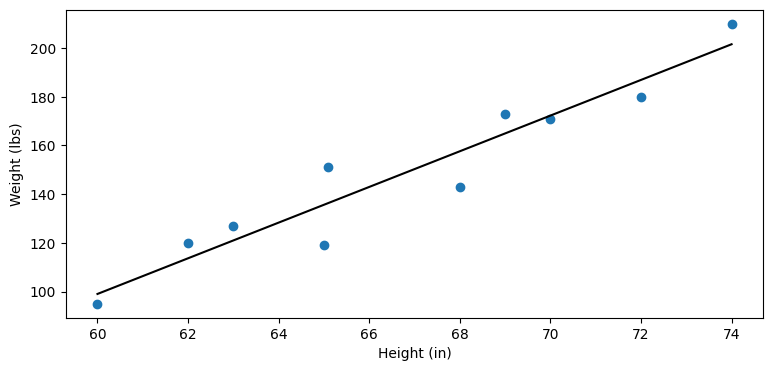

In [2]:
%matplotlib inline

import book_format
book_format.set_style()

from kf_book.gaussian_internal import plot_correlated_data

height = [60, 62, 63, 65, 65.1, 68, 69, 70, 72, 74]
weight = [95, 120, 127, 119, 151, 143, 173, 171, 180, 210]
plot_correlated_data(height, weight, 'Height (in)', 'Weight (lbs)', False)

In [3]:
import numpy as np

W = [70.1, 91.2, 59.5, 93.2, 53.5]
H = [1.8, 2.0, 1.7, 1.9, 1.6]
np.cov(H, W)

array([[  0.025,   2.727],
       [  2.727, 327.235]])

In [3]:
np.cov(H, W, bias=1)

array([[  0.02 ,   2.182],
       [  2.182, 261.788]])

In [4]:
X = np.linspace(1, 10, 100)
Y = np.linspace(1, 10, 100)
np.cov(X, Y)

array([[6.956, 6.956],
       [6.956, 6.956]])

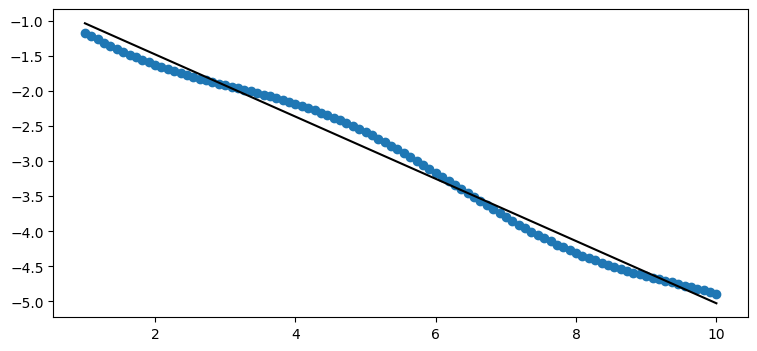

[[ 6.956 -3.084]
 [-3.084  1.387]]


In [5]:
X = np.linspace(1, 10, 100)
Y = -(np.linspace(1, 5, 100) + np.sin(X)*.2)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

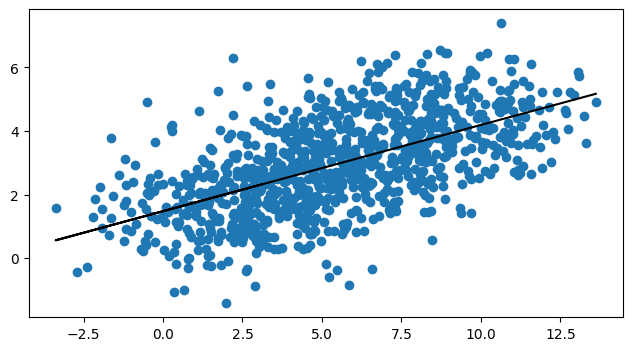

[[10.635  2.885]
 [ 2.885  2.254]]


In [6]:
from numpy.random import randn
X = np.linspace(1, 10, 1000) + randn(1000)*2
Y = np.linspace(1, 5, 1000) + randn(1000)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

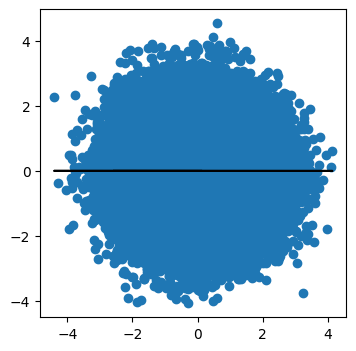

[[ 1.004 -0.   ]
 [-0.     1.002]]


In [7]:
X = randn(100000)
Y = randn(100000)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

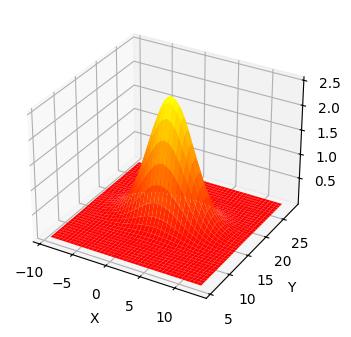

In [4]:
import kf_book.mkf_internal as mkf_internal

mean = [2., 17.]
cov = [[10., 0.], 
       [0., 4.]]

mkf_internal.plot_3d_covariance(mean, cov)

In [10]:
from filterpy.stats import gaussian, multivariate_gaussian

x = [2.5, 7.3]
mu = [2.0, 7.0]

P = [[8., 0.], 
     [0., 3.]]
multivariate_gaussian(x, mu, P)

0.031507521572225645

In [11]:
import scipy
from scipy.stats import multivariate_normal
print(f'{multivariate_normal(mu, P).pdf(x):.4f}')

0.0315


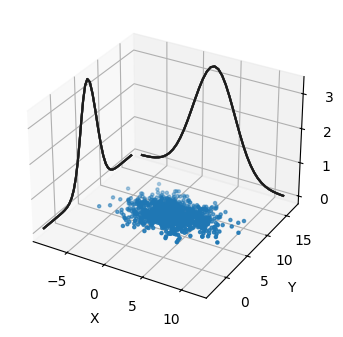

In [12]:
mkf_internal.plot_3d_sampled_covariance(mu, P)

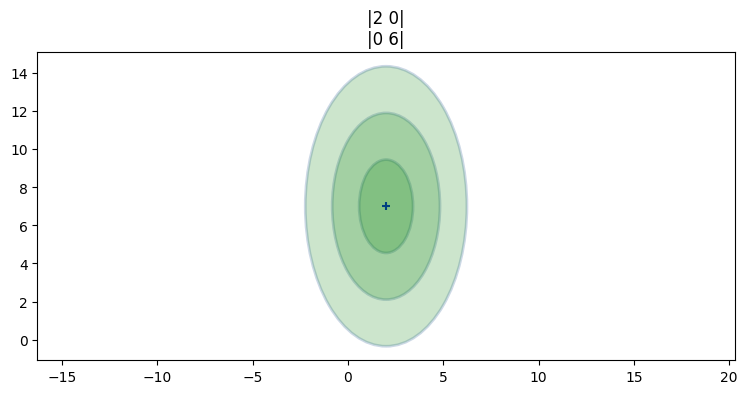

In [5]:
from filterpy.stats import plot_covariance_ellipse
import matplotlib.pyplot as plt

P = [[2, 0], [0, 6]]
plot_covariance_ellipse((2, 7), P, fc='g', alpha=0.2, 
                        std=[1, 2, 3],
                        title='|2 0|\n|0 6|')
plt.gca().grid(False);

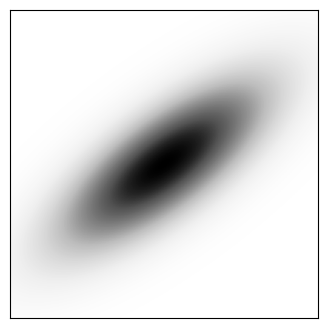

In [6]:
from kf_book.nonlinear_plots import plot_cov_ellipse_colormap
plot_cov_ellipse_colormap(cov=[[2, 1.2], [1.2, 1.3]]);

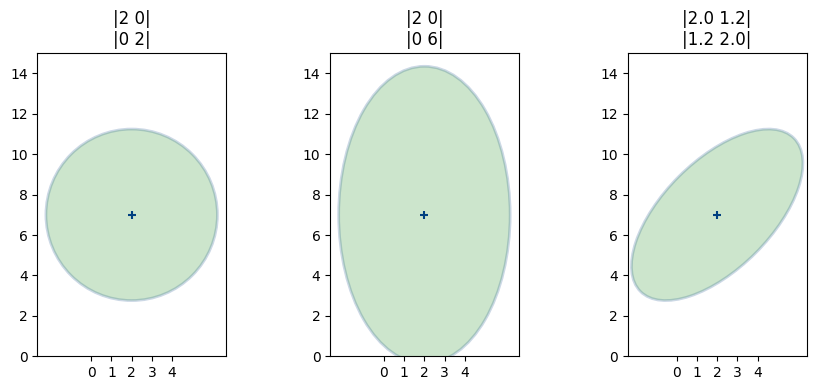

In [7]:
mkf_internal.plot_3_covariances()

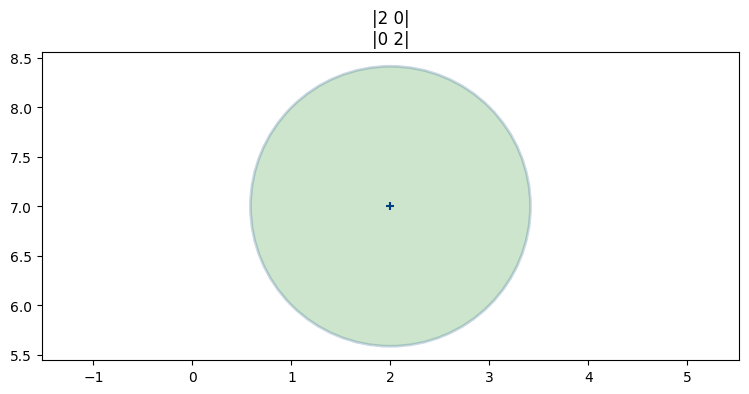

In [9]:
x = [2, 7]
P = [[2, 0], [0, 2]]
plot_covariance_ellipse(x, P, fc='g', alpha=0.2, 
                       title='|2 0|\n|0 2|')
plt.gca().grid(False)

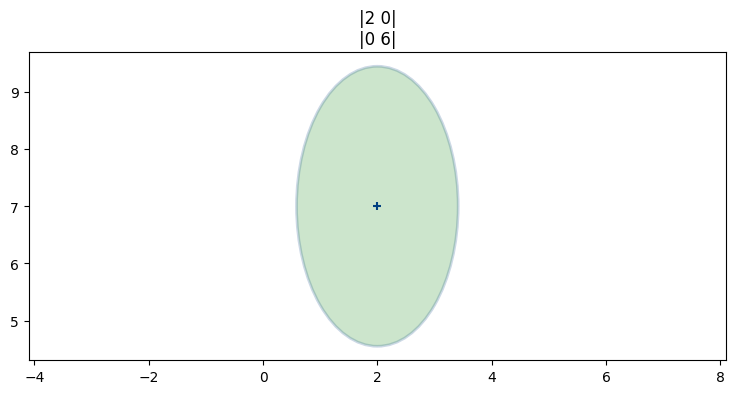

In [10]:
x = [2, 7]
P = [[2, 0], [0, 6]]
plot_covariance_ellipse(x, P, fc='g', alpha=0.2, 
                    title='|2 0|\n|0 6|')
plt.gca().grid(False)

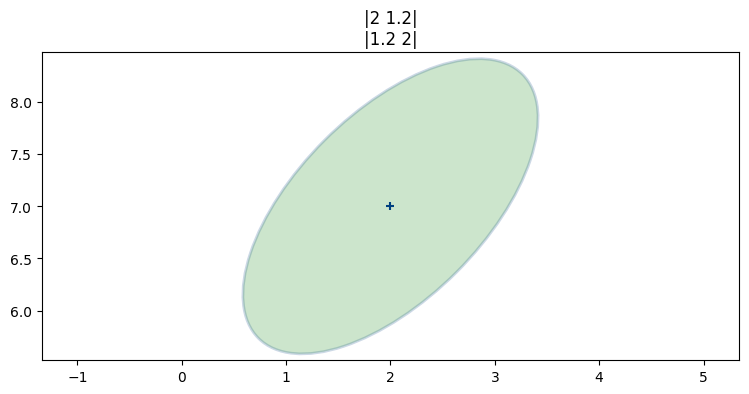

In [11]:
x = [2, 7]
P = [[2, 1.2], [1.2, 2]]
plot_covariance_ellipse(x, P, fc='g', alpha=0.2, 
                    title='|2 1.2|\n|1.2 2|')

In [12]:
cov_hw = np.cov(np.vstack((height, weight)), bias=1)
cov_hw

array([[  18.525,  135.701],
       [ 135.701, 1092.29 ]])

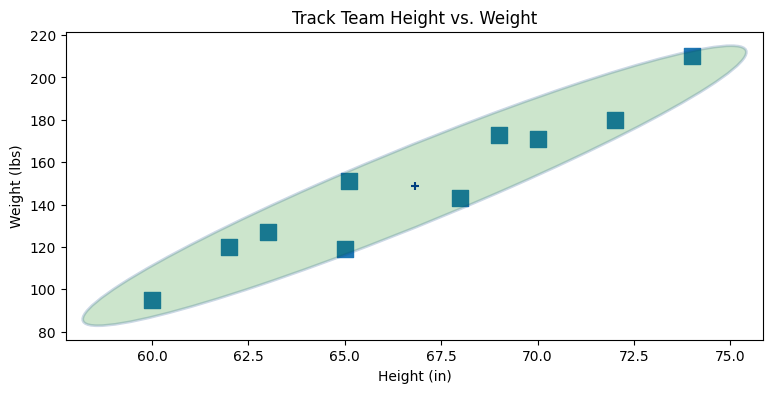

In [13]:
plt.scatter(height, weight, s=120, marker='s')
plt.title('Track Team Height vs. Weight')
plt.xlabel('Height (in)'); plt.ylabel('Weight (lbs)')
plot_covariance_ellipse((np.mean(height), np.mean(weight)), cov_hw, fc='g', 
                        alpha=0.2, axis_equal=False, std=2)

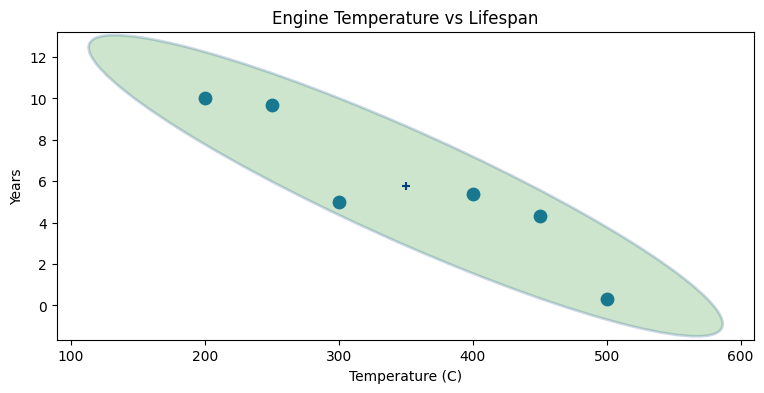

In [14]:
max_temp = [200, 250, 300, 400, 450, 500]
lifespan = [10, 9.7, 5, 5.4, 4.3, 0.3]

plt.scatter(max_temp, lifespan, s=80)
cov = np.cov(np.vstack((max_temp, lifespan)))
plot_covariance_ellipse((np.mean(max_temp), np.mean(lifespan)), cov, fc='g', 
            alpha=0.2, axis_equal=False, std=2)
plt.title('Engine Temperature vs Lifespan')
plt.xlabel('Temperature (C)'); plt.ylabel('Years');

In [15]:
from ipywidgets import interact
from kf_book.book_plots import figsize, FloatSlider

fig = None
def plot_covariance(var_x, var_y, cov_xy):
    global fig
    if fig: plt.close(fig)
    fig = plt.figure(figsize=(4,4))
    P1 = [[var_x, cov_xy], [cov_xy, var_y]]

    plot_covariance_ellipse((10, 10), P1, axis_equal=False,
                            show_semiaxis=True)

    plt.xlim(4, 16)
    plt.gca().set_aspect('equal')
    plt.ylim(4, 16)

    
with figsize(y=6):
    interact (plot_covariance,           
          var_x=FloatSlider(5, min=0, max=20), 
          var_y=FloatSlider(5, min=0, max=20), 
          cov_xy=FloatSlider(1.5, min=0, max=50, step=.2));

interactive(children=(FloatSlider(value=5.0, continuous_update=False, description='var_x', max=20.0), FloatSli…

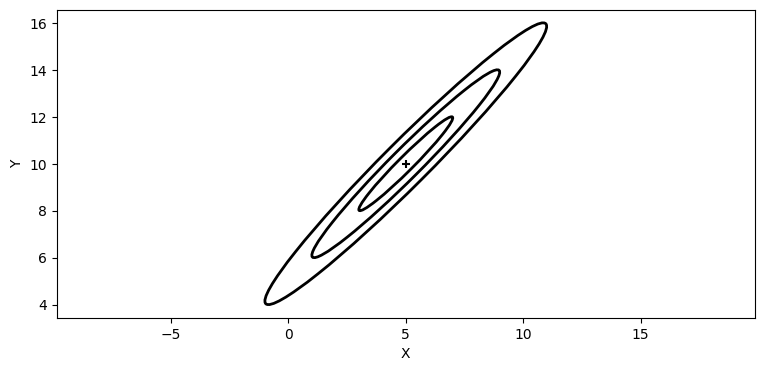

In [16]:
P = [[4, 3.9], [3.9, 4]]

plot_covariance_ellipse((5, 10), P, ec='k', std=[1, 2, 3])
plt.xlabel('X')
plt.ylabel('Y');

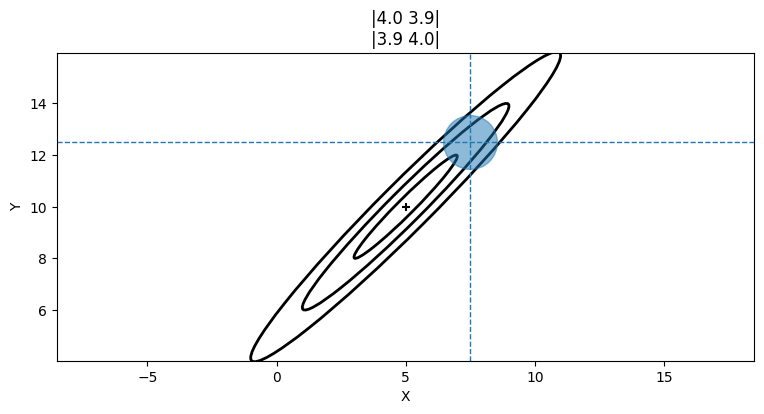

In [17]:
mkf_internal.plot_correlation_covariance()

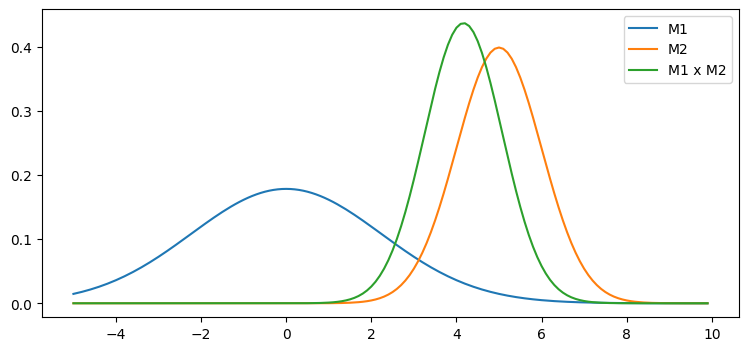

In [18]:
mkf_internal.plot_gaussian_multiply()

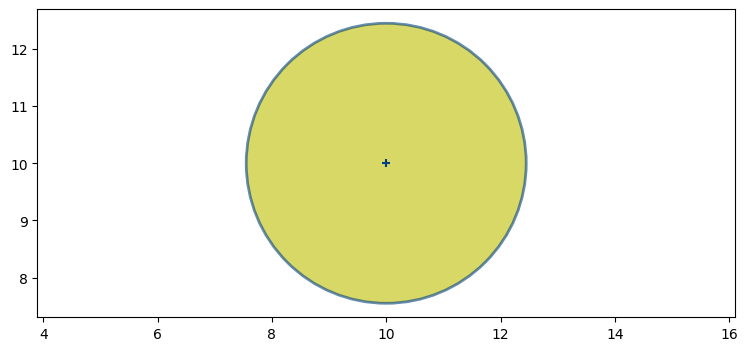

In [19]:
P0 = [[6, 0], [0, 6]]
plot_covariance_ellipse((10, 10), P0, fc='y', alpha=0.6)

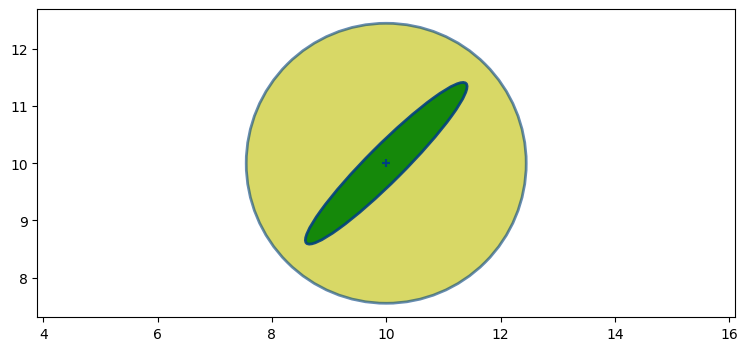

In [20]:
P1 = [[2, 1.9], [1.9, 2]]
plot_covariance_ellipse((10, 10), P0, fc='y', alpha=0.6)
plot_covariance_ellipse((10, 10), P1, fc='g', alpha=0.9)

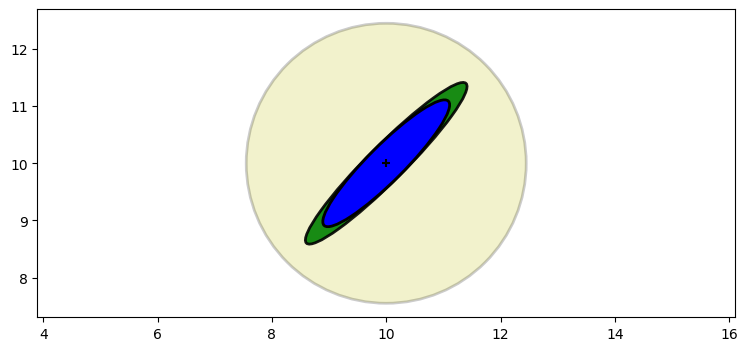

In [21]:
from filterpy.stats import multivariate_multiply

P2 = multivariate_multiply((10, 10), P0, (10, 10), P1)[1]
plot_covariance_ellipse((10, 10), P0, ec='k', fc='y', alpha=0.2)
plot_covariance_ellipse((10, 10), P1, ec='k', fc='g', alpha=0.9)
plot_covariance_ellipse((10, 10), P2, ec='k', fc='b')

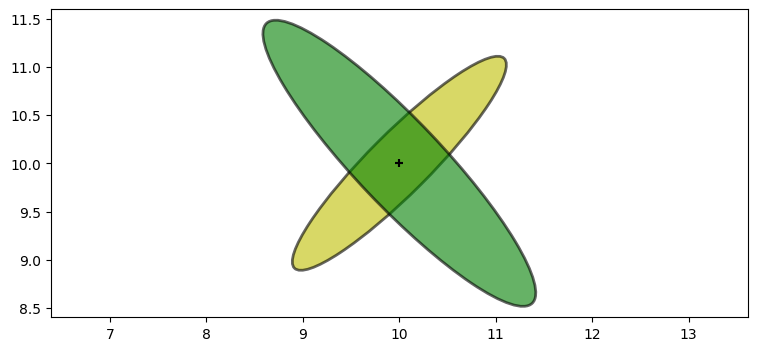

In [22]:
P3 = [[2, -1.9], [-1.9, 2.2]]
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.6)
plot_covariance_ellipse((10, 10), P3, ec='k', fc='g', alpha=0.6)

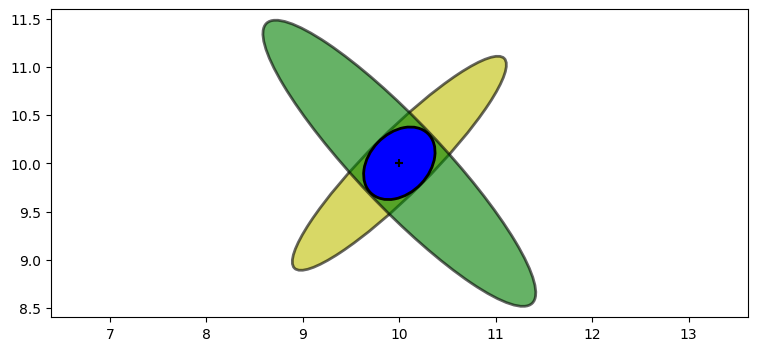

In [23]:
P4 = multivariate_multiply((10, 10), P2, (10, 10), P3)[1]
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.6)
plot_covariance_ellipse((10, 10), P3, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse((10, 10), P4, ec='k', fc='b')

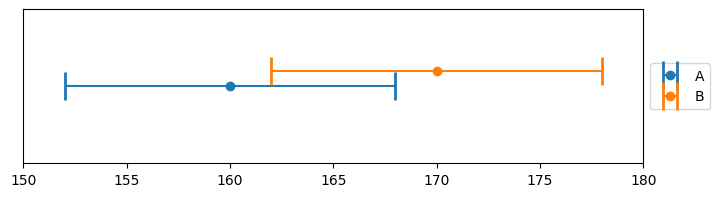

In [24]:
import kf_book.book_plots as book_plots
book_plots.plot_errorbars([(160, 8, 'A'), (170, 8, 'B')], xlims=(150, 180))

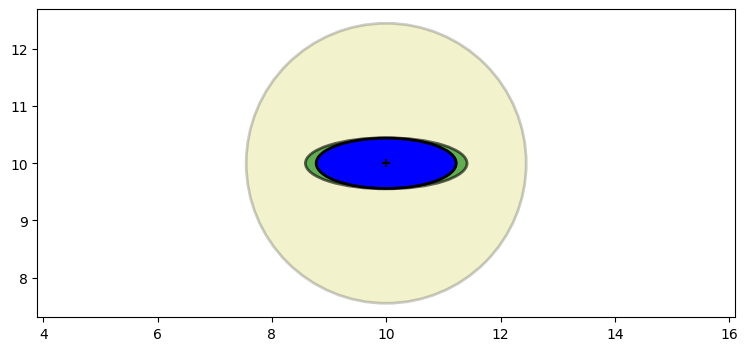

In [25]:
P1 = [[2, 0], [0, .2]]
P2 = multivariate_multiply((10, 10), P0, (10, 10), P1)[1]
plot_covariance_ellipse((10, 10), P0, ec='k', fc='y', alpha=0.2)
plot_covariance_ellipse((10, 10), P1, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse((10, 10), P2, ec='k', fc='b')

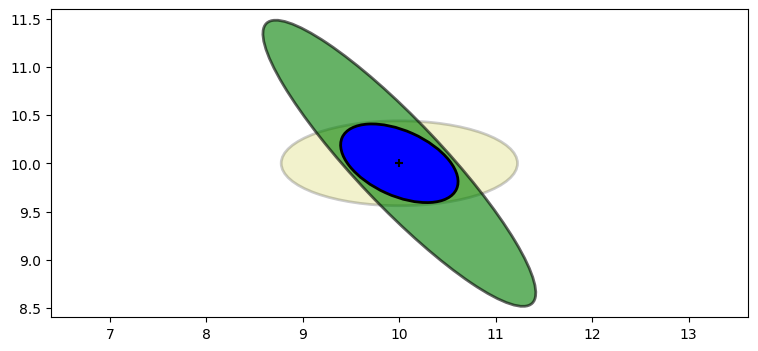

In [26]:
P3 = [[2, -1.9], [-1.9, 2.2]]
P4 = multivariate_multiply((10, 10), P2, (10, 10), P3)[1]
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.2)
plot_covariance_ellipse((10, 10), P3, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse((10, 10), P4, ec='k', fc='b')

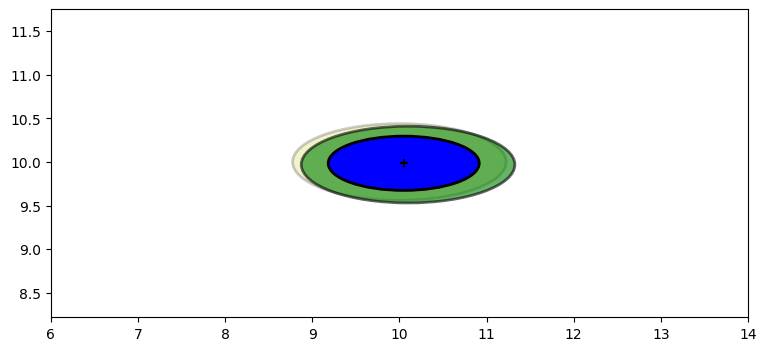

In [27]:
P5 = multivariate_multiply((10,10), P2, (10.1, 9.97), P2)
plot_covariance_ellipse((10, 10), P2, ec='k', fc='y', alpha=0.2)
plot_covariance_ellipse((10.1, 9.97), P2, ec='k', fc='g', alpha=0.6)
plot_covariance_ellipse(P5[0], P5[1], ec='k', fc='b')
plt.xlim(6, 14);

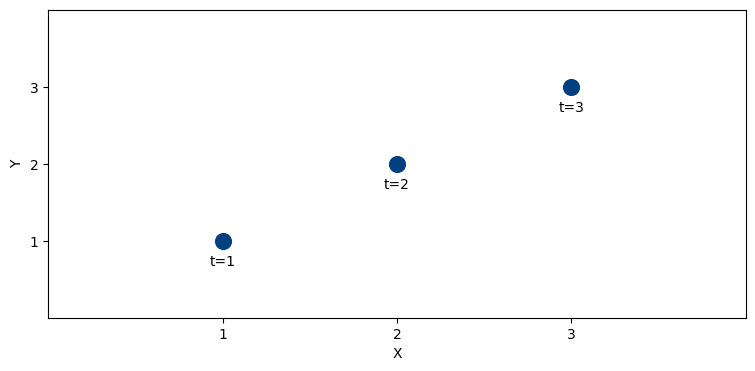

In [28]:
mkf_internal.show_position_chart()

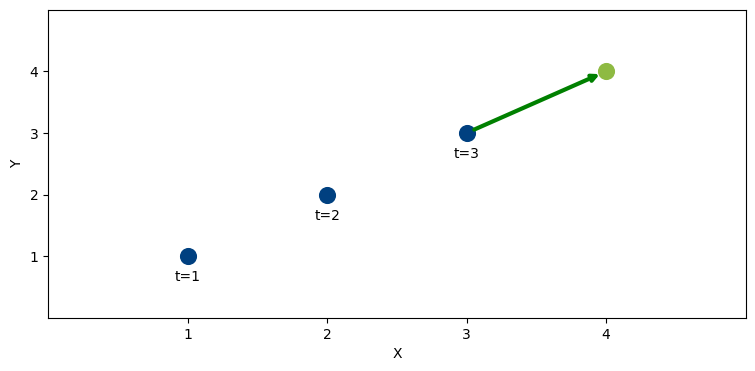

In [29]:
mkf_internal.show_position_prediction_chart()

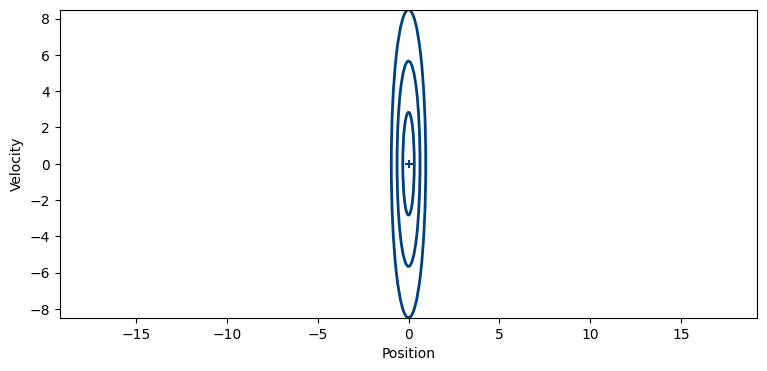

In [30]:
mkf_internal.show_x_error_chart(1)

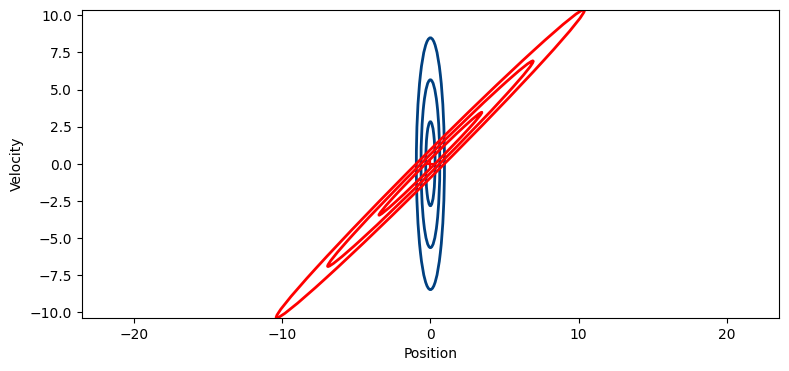

In [31]:
mkf_internal.show_x_error_chart(2)

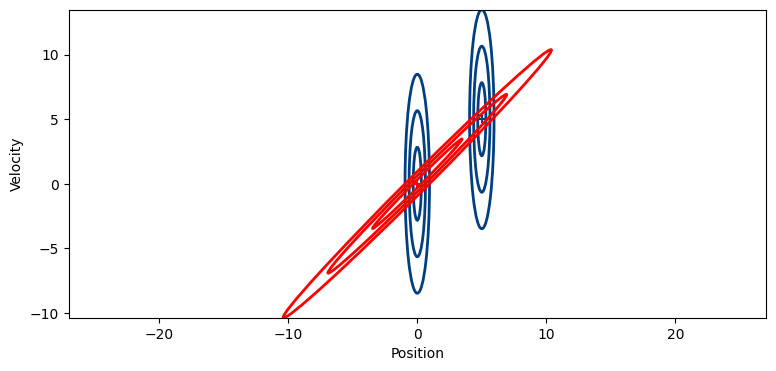

In [32]:
mkf_internal.show_x_error_chart(3)

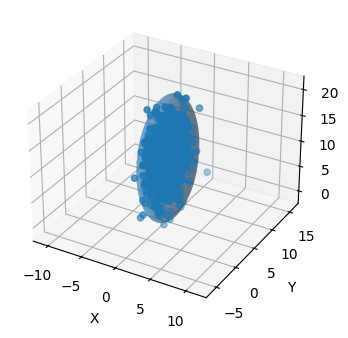

In [34]:
from filterpy.stats import plot_3d_covariance

mu = [0.3, 5., 10.]
C = np.array([[1.0, .03, .2],
              [.03,  4.0, .0],
              [.2,  .0, 16.1]])

sample = np.random.multivariate_normal(mu, C, size=1000)

ax = plot_3d_covariance(mu, C, alpha=.4, std=3, limit_xyz=True)
ax.scatter(sample[:, 0], sample[:, 1], zs=sample[:, 2],);
